In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add root path (parent folder) to path
import os
import sys
cwd = os.getcwd()
root_path = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.insert(0, root_path)

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

## run for all cells (OFF LINE)

run
```
python3 stcl_batch.py [DATASET] --dim D
```

datasets
* 20180618
* 20180621
* 20180626

## choose dataset

In [2]:
#dataset_name = "20180618"
# dataset_name = "20180621"
dataset_name = "20180626"

## load stim and spike data

In [3]:
# data_folder_name = "data"
# stim, spike_train, info = pysta.load_data(dataset_name, data_folder_name)

# # channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]   # NOT NEEDED ANYMORE
# # info["channel_names"]
# # info["cell_types"]

In [4]:
# # calc number of spikes
# tap = 8 # -700 ms ~ 0

# num_samples = list()
# num_spikes = list()
# for idx in range(spike_train.shape[0]):    
#     spike_triggered_stim, spike_count = pysta.grab_spike_triggered_stim(stim, spike_train[idx], tap)
    
#     num_samples.append(spike_triggered_stim.shape[0])
#     num_spikes.append(np.sum(spike_count))

# num_samples_df = pd.DataFrame({"channel_name": info["channel_names"], "number_of_samples": num_samples, "number_of_spikes": num_spikes})
# # num_samples_df

In [5]:
## read largest eigenvalues from STC results

# folder_name = "{}_tap{}_stc_classic".format(dataset_name, tap)

# largest_eigen_values = list()
# second_largest_eigen_values = list()
# third_largest_eigen_values = list()
# for channel_name in info["channel_names"]:
#     filename = "ch_{}_eig_val.txt".format(channel_name)
#     #print(os.path.join(folder_name,filename))    
#     eigs = np.loadtxt(os.path.join(folder_name,filename))
#     largest_eigen_values.append(eigs[0])
#     second_largest_eigen_values.append(eigs[1])
#     third_largest_eigen_values.append(eigs[2])    
# largest_eigen_values_df = pd.DataFrame({"channel_name": info["channel_names"], "eig1": largest_eigen_values, "eig2": second_largest_eigen_values, "eig3": third_largest_eigen_values})

# largest_eigen_values_df.hist()

## read clustering results

In [6]:
tap = 8 # -700 ms ~ 0
cluster_dim = 2


results_path = os.path.join(root_path,'results')


folder_name = os.path.join(results_path, "binary_stim_{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, cluster_dim))
filename = os.path.join(folder_name, "clusters.csv")

clusters = pd.read_csv(filename)
# weights
# weights.head()
# clusters.head()


# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)
clusters.head()

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product
0,12a,4173,0.302181,0.019981,0.578403,0.552195,0.544442,True,0.310680,0.020893,0.565100,0.280776,0.028428,0.434900,0.139093
1,12b,1239,0.489911,0.026305,0.744122,0.728674,0.719256,True,0.581081,0.044608,0.466726,0.438994,0.026593,0.533274,0.162536
2,12c,80,0.600000,0.062627,2.975778,2.937412,2.898726,True,0.666667,0.115114,0.269496,0.625000,0.079557,0.730504,-0.454613
3,13a,8830,0.183579,0.011100,0.432604,0.424380,0.422611,True,0.204580,0.024761,0.517139,0.200667,0.026420,0.482861,-0.209441
4,13b,998,0.589178,0.034582,1.284069,1.216870,1.162347,True,0.576110,0.033392,0.970984,0.923077,0.161691,0.029016,0.632745


## check some statistics

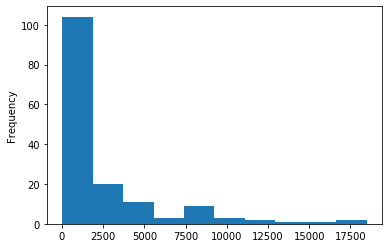

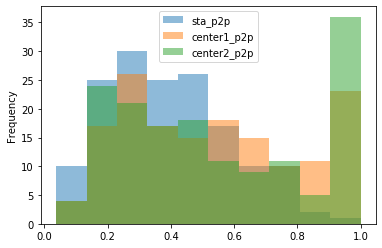

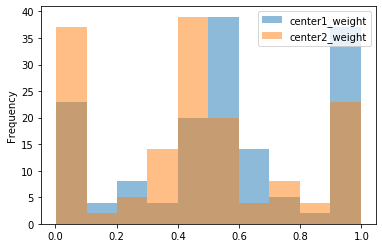

In [7]:
clusters['num_spikes'].plot.hist()
clusters[['sta_p2p', 'center1_p2p', 'center2_p2p']].plot.hist(alpha=0.5)
clusters[['center1_weight', 'center2_weight']].plot.hist(alpha=0.5)


## max weights

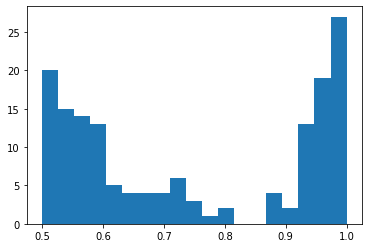

In [8]:
# check max_weight
clusters["max_weight"] = np.maximum(clusters["center1_weight"], clusters["center2_weight"])

bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("figure/max_weight_hist.png")

## peak-to-peak difference

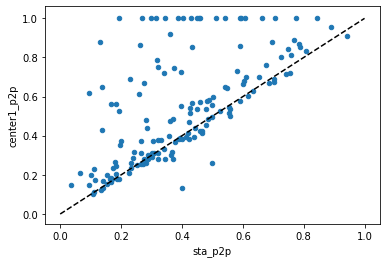

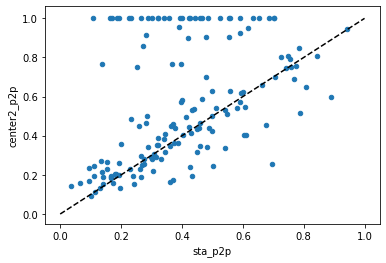

In [9]:
clusters.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0,1], [0,1], 'k--')
clusters.plot.scatter("sta_p2p", "center2_p2p")
plt.plot([0,1], [0,1], 'k--')

# clusters.plot.scatter("PSNR", "PSNR1")
# plt.plot([5,25], [5,25], 'k--')
# clusters.plot.scatter("PSNR", "PSNR2")
# plt.plot([5,25], [5,25], 'k--')

In [10]:
idx_p2p_increased1 = np.where(clusters["sta_p2p"] < clusters["center1_p2p"])
idx_p2p_increased2 = np.where(clusters["sta_p2p"] < clusters["center2_p2p"])

clusters.iloc[np.union1d(idx_p2p_increased1, idx_p2p_increased2)]

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,max_weight
0,12a,4173,0.302181,0.019981,0.578403,0.552195,0.544442,True,0.310680,0.020893,0.565100,0.280776,0.028428,0.434900,0.139093,0.565100
1,12b,1239,0.489911,0.026305,0.744122,0.728674,0.719256,True,0.581081,0.044608,0.466726,0.438994,0.026593,0.533274,0.162536,0.533274
2,12c,80,0.600000,0.062627,2.975778,2.937412,2.898726,True,0.666667,0.115114,0.269496,0.625000,0.079557,0.730504,-0.454613,0.730504
3,13a,8830,0.183579,0.011100,0.432604,0.424380,0.422611,True,0.204580,0.024761,0.517139,0.200667,0.026420,0.482861,-0.209441,0.517139
4,13b,998,0.589178,0.034582,1.284069,1.216870,1.162347,True,0.576110,0.033392,0.970984,0.923077,0.161691,0.029016,0.632745,0.970984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,86c,705,0.276596,0.027016,1.188350,1.152660,1.125220,True,0.671875,0.108309,0.108155,0.279251,0.026847,0.891845,0.115506,0.891845
152,86d,151,0.403974,0.046548,2.244849,2.097623,1.944011,True,1.000000,0.363008,0.013423,0.401361,0.046253,0.986577,0.476190,0.986577
153,87a,9120,0.602632,0.027801,0.590420,0.517161,0.512286,True,0.678760,0.035641,0.600716,0.401597,0.028217,0.399284,0.056941,0.600716
154,87b,3797,0.321306,0.019283,0.487358,0.482080,0.475510,True,0.280390,0.030543,0.473213,0.388212,0.032063,0.526787,-0.128654,0.526787


In [11]:
clusters.iloc[np.intersect1d(idx_p2p_increased1, idx_p2p_increased2)]

,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,max_weight
2,12c,80,0.600000,0.062627,2.975778,2.937412,2.898726,True,0.666667,0.115114,0.269496,0.625000,0.079557,0.730504,-4.546131e-01,0.730504
3,13a,8830,0.183579,0.011100,0.432604,0.424380,0.422611,True,0.204580,0.024761,0.517139,0.200667,0.026420,0.482861,-2.094406e-01,0.517139
6,13d,342,0.228070,0.031993,1.776912,1.658930,1.647190,True,0.690476,0.121074,0.091966,0.230000,0.033310,0.908034,-1.217460e-01,0.908034
7,13e,112,0.285714,0.048603,2.438375,2.330179,2.277194,True,0.437500,0.070264,0.578999,0.500000,0.090154,0.421001,-7.740885e-01,0.578999
10,14c,214,0.457944,0.043017,1.768600,1.759664,1.702648,True,1.000000,0.210905,0.038252,0.465347,0.043477,0.961748,1.270627e-01,0.961748
11,14d,73,0.356164,0.065997,7.419156,4.245199,3.822157,True,0.400000,0.063303,0.955882,1.000000,0.310279,0.044118,5.192308e-02,0.955882
17,17c,394,0.233503,0.038399,1.924233,1.897407,1.874901,True,0.259136,0.040879,0.751136,0.483871,0.086312,0.248864,1.195477e-01,0.751136
20,21b,241,0.746888,0.083413,5.766457,5.400769,5.269912,True,0.843750,0.122004,0.339914,0.805310,0.099708,0.660086,5.888413e-01,0.660086
23,21e,138,0.652174,0.056056,2.547135,2.431784,2.331113,True,0.700787,0.056884,0.949437,1.000000,0.219881,0.050563,3.092341e-01,0.949437
24,22a,2860,0.397552,0.022644,0.838246,0.704459,0.671715,True,0.725987,0.038789,0.647365,0.573548,0.038685,0.352635,-4.795333e-01,0.647365


In [12]:
clusters_with_negative_inner_product = clusters.loc[clusters["centers_inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product

71 156


,channel_name,num_spikes,sta_p2p,sta_std,stc_eig1,stc_eig2,stc_eig3,converged,center1_p2p,center1_std,center1_weight,center2_p2p,center2_std,center2_weight,centers_inner_product,max_weight
2,12c,80,0.600000,0.062627,2.975778,2.937412,2.898726,True,0.666667,0.115114,0.269496,0.625000,0.079557,0.730504,-0.454613,0.730504
3,13a,8830,0.183579,0.011100,0.432604,0.424380,0.422611,True,0.204580,0.024761,0.517139,0.200667,0.026420,0.482861,-0.209441,0.517139
6,13d,342,0.228070,0.031993,1.776912,1.658930,1.647190,True,0.690476,0.121074,0.091966,0.230000,0.033310,0.908034,-0.121746,0.908034
7,13e,112,0.285714,0.048603,2.438375,2.330179,2.277194,True,0.437500,0.070264,0.578999,0.500000,0.090154,0.421001,-0.774089,0.578999
13,16b,234,0.269231,0.040093,2.185584,2.136243,1.995541,True,1.000000,0.190756,0.063070,0.252294,0.040721,0.936930,-0.015195,0.936930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,82a,5543,0.363882,0.024119,0.585823,0.543183,0.539145,True,0.299180,0.031880,0.415930,0.449457,0.034890,0.584070,-0.062057,0.584070
142,82b,2842,0.432442,0.027887,0.798825,0.714066,0.700224,True,0.568562,0.039782,0.601114,0.192256,0.029944,0.398886,-0.187547,0.601114
144,83a,17646,0.398617,0.019586,0.493440,0.462766,0.458015,True,0.134897,0.019722,0.490446,0.580716,0.032880,0.509554,-0.096563,0.509554
150,86b,1684,0.109857,0.016204,0.788005,0.759195,0.735989,True,0.111530,0.018068,0.661028,0.243697,0.040039,0.338972,-0.018733,0.661028


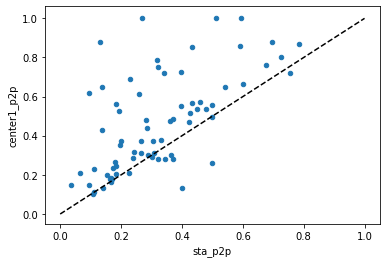

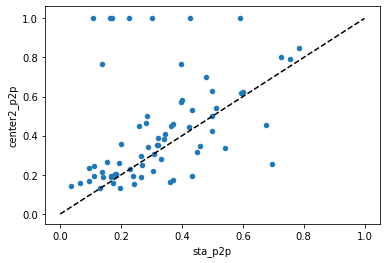

In [13]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center1_p2p")
plt.plot([0,1], [0,1], 'k--')
clusters_with_negative_inner_product.plot.scatter("sta_p2p", "center2_p2p")
plt.plot([0,1], [0,1], 'k--')

## re-calc peak diff

In [14]:
# #folder_name
# sta_diff = list()
# cluster_diff = list()
# for ch_name in clusters['channel_name']:
#     data = np.load(os.path.join(folder_name, ch_name + '.npz'))
#     sta = data['sta']
#     centers = data['group_centers']
    
#     sta_diff.append(np.max(sta) - np.min(sta))
#     cluster_diff.append(np.max(data['group_centers'], axis=1) - np.min(data['group_centers'], axis=1))
# # sta_diff
# cluster_diff = np.array(cluster_diff)
# cluster_diff.shape    

In [15]:
# # add to df
# clusters['peak_diff'] = sta_diff
# clusters['peak_diff1'] = cluster_diff[:,0]
# clusters['peak_diff2'] = cluster_diff[:,1]

# filename = os.path.join(folder_name, "clusters_.csv")
# clusters.to_csv(filename, index=None)

In [16]:
# # double check
# clusters.plot.scatter('sta_p2p', "peak_diff")
# clusters.plot.scatter('center1_p2p', "peak_diff1")
# clusters.plot.scatter('center2_p2p', "peak_diff2")



In [17]:
# clusters.plot.scatter("peak_diff", "peak_diff1")
# plt.plot([0, 1], [0, 1], 'k--')
# clusters.plot.scatter("peak_diff", "peak_diff2")
# plt.plot([0, 1], [0, 1], 'k--')

In [18]:
# clusters.plot.scatter("num_spikes", "peak_diff")
# clusters.plot.scatter("num_spikes", "peak_diff1")
# clusters.plot.scatter("num_spikes", "peak_diff2")

In [19]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

# analyze for each cell type

### histogram of  innerproduct for each cell type

In [20]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

In [21]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["centers_inner_product"].hist(by=clusters["cell_type"])

KeyError: 'cell_type'

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
plt.subplot(222)
pysta.plot_histogram_by_cell_type(clusters, "eig1")
plt.subplot(223)
pysta.plot_histogram_by_cell_type(clusters, "PSNR")
plt.subplot(224)
pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(dataset_name, tap, cluster_dim))

## Focus on data with enough samples

In [ ]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [ ]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "num_spikes")
plt.subplot(222)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "eig1")
plt.subplot(223)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "PSNR")
plt.subplot(224)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(dataset_name, tap, cluster_dim))

In [ ]:
# plot inner product only
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

In [ ]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    im = plt.imread(os.path.join(base_folder_name + "{}".format(d), channel_name + "_centers.png"))
    
    plt.figure(figsize=(20,8))
    plt.imshow(im)
    plt.box('off')
    plt.axis('off')
    plt.show()

In [ ]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    centers = np.load(os.path.join(base_folder_name + "{}".format(d), channel_name + ".npz"))
    
    sta = centers['sta']
    group_centers = centers['group_centers']
    
    # plot group_centers
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, group_centers, grid_T)
#     stcl.plot_centers(sta, group_centers, grid_T, cl.weights_, PSNR, [PSNR0, PSNR1])

#     plt.figure(figsize=(20,8))
#     plt.imshow(im)
#     plt.box('off')
#     plt.axis('off')
#     plt.show()

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [ ]:
# from scipy import stats

In [ ]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [ ]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])